## Slug Test at Pratt County
**This test is taken from AQTESOLV examples.**

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ttim import *

Set basic parameters:

In [2]:
rw = 0.125 # well radius
rc = 0.064 # well casing radius
L = 1.52 # screen length
b = -47.87 # aquifer thickness
zt = -16.77 # depth to top of screen
H0 = 0.671 # initial displacement in the well
zb = zt - L # bottom of screen

Slug:

In [3]:
Q = np.pi * rc ** 2 * H0
print('slug:', round(Q, 5), 'm^3')

slug: 0.00863 m^3


Load data:

In [4]:
data = np.loadtxt('data/slug.txt', skiprows = 1)
t = data[:, 0] / 60 / 60 / 24 #convert time to days
h = data[:, 1] 

Create conceptual model:

In [5]:
ml = Model3D(kaq=10, z=[0, zt, zb, b], Saq=1e-4, kzoverkh=1, tmin=1e-6, tmax=0.01)
w = Well(ml, xw=0, yw=0, rw=rw,rc=rc, tsandQ=[(0, -Q)], layers=1, wbstype='slug')
ml.solve()

self.neq  1
solution complete


In [6]:
ca = Calibrate(ml)
ca.set_parameter(name='kaq0_2', initial=10)
ca.set_parameter(name='Saq0_2', initial=1e-4)
ca.series(name='obs', x=0, y=0, layer=1, t=t, h=h)
ca.fit(report=True)

......................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 19
    # data points      = 61
    # variables        = 2
    chi-square         = 5.0348e-04
    reduced chi-square = 8.5335e-06
    Akaike info crit   = -709.995370
    Bayesian info crit = -705.773623
[[Variables]]
    kaq0_2:  6.08820525 +/- 0.02361734 (0.39%) (init = 10)
    Saq0_2:  2.0346e-04 +/- 9.3252e-06 (4.58%) (init = 0.0001)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq0_2, Saq0_2) = -0.594


In [7]:
display(ca.parameters)
print('RMSE:', ca.rmse())

,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0_2,6.08821,0.023617,0.38792,-inf,inf,10,"[6.088205252331587, 6.088205252331587, 6.08820..."
Saq0_2,0.000203455,0.000009,4.5834,-inf,inf,0.0001,"[0.00020345513163869057, 0.0002034551316386905..."


RMSE: 0.0028729351611905735


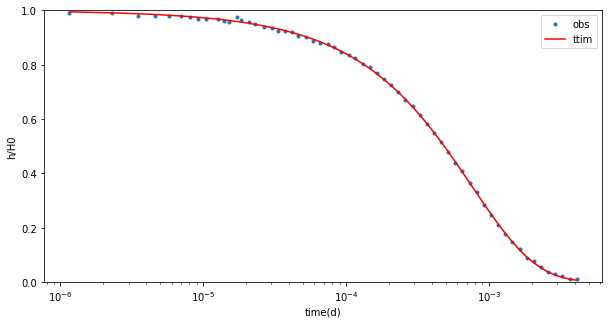

In [8]:
hm = ml.head(0, 0, t, layers=1)
plt.figure(figsize = (10, 5))
plt.semilogx(t, h/H0, '.', label='obs')
plt.semilogx(t, hm[-1]/H0, 'r', label='ttim')
plt.ylim([0, 1])
plt.xlabel('time(d)')
plt.ylabel('h/H0')
plt.legend();

Conceptual model with multi-layer:

In [9]:
n1 = 18
n2 = 3
n3 = 29
nlay = n1 + n2 + n3 #number of layers
zlay1 = np.linspace(0, zt, n1 + 1)
zlay2 = np.linspace(zt, zb, n2 + 1)
zlay3 = np.linspace(zb, b, n3 + 1)
layers = np.append(zlay1[:-1], zlay2[:-1])
layers = np.append(layers, zlay3) #elevation of each layer
Saq = 1e-4 * np.ones(nlay)
Saq[0] = 0.1

In [10]:
M_nlay = Model3D(kaq=10, z=layers, Saq=Saq, kzoverkh=1, phreatictop=True,\
                 tmin=1e-6, tmax=0.01)
W_nlay = Well(M_nlay, xw=0, yw=0, rw=rw, tsandQ=[(0, -Q)], layers=[18,19,20], \
              rc=rc, wbstype='slug')
M_nlay.solve()

self.neq  3
solution complete


In [11]:
cM = Calibrate(M_nlay)
cM.set_parameter(name='kaq0_49', initial=10)
cM.set_parameter(name='Saq0_49', initial=1e-4, pmin=0)
cM.series(name='obs', x=0, y=0, layer=[18,19,20], t=t, h=h)
cM.fit()

......................................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 51
    # data points      = 183
    # variables        = 2
    chi-square         = 0.00159231
    reduced chi-square = 8.7973e-06
    Akaike info crit   = -2128.32629
    Bayesian info crit = -2121.90732
[[Variables]]
    kaq0_49:  4.26515924 +/- 0.01222410 (0.29%) (init = 10)
    Saq0_49:  4.9276e-04 +/- 1.8069e-05 (3.67%) (init = 0.0001)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq0_49, Saq0_49) = -0.767


In [12]:
display(cM.parameters)
print('RMSE:', cM.rmse())

,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0_49,4.26516,0.012224,0.286604,-inf,inf,10,"[4.2651592443521205, 4.2651592443521205, 4.265..."
Saq0_49,0.000492763,0.000018,3.66691,0.0,inf,0.0001,"[0.0004927634772056155, 0.0004927634772056155,..."


RMSE: 0.0029497698923064536


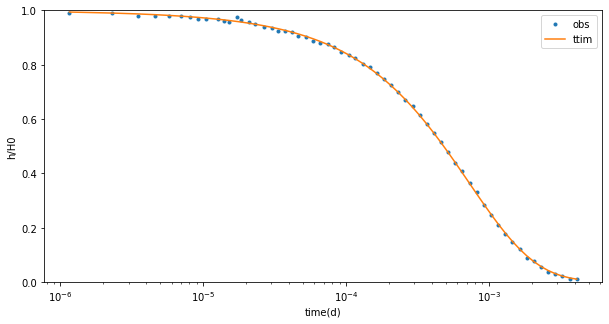

In [13]:
hM = M_nlay.head(0, 0, t, layers = 20)
plt.figure(figsize = (10, 5))
plt.semilogx(t, h / H0, '.', label = 'obs')
plt.semilogx(t, hM[0] / H0, label = 'ttim')
plt.ylim([0, 1])
plt.xlabel('time(d)')
plt.ylabel('h/H0')
plt.legend();

### Summary of values simulated by AQTESOLV:

In [14]:
ta = pd.DataFrame(columns=['k [m/d]', 'Ss [1/m]'], \
                 index=['AQTESOLV', 'ttim-three', 'ttim-multi'])
ta.loc['ttim-three'] = ca.parameters['optimal'].values
ta.loc['ttim-multi'] = cM.parameters['optimal'].values
ta.loc['AQTESOLV'] = [4.034, 3.834E-04]
ta['RMSE'] = [0.002976, ca.rmse(), cM.rmse()]
ta

,k [m/d],Ss [1/m],RMSE
AQTESOLV,4.034,0.0003834,0.002976
ttim-three,6.08821,0.000203455,0.002873
ttim-multi,4.26516,0.000492763,0.002950
